In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

## 정규분포 함수

In [2]:
x=3
mu=4
sigma=1
stats.norm.pdf(loc=mu,scale=sigma,x=3)

0.24197072451914337

In [3]:
stats.norm.cdf(loc=mu,scale=sigma,x=3)

0.15865525393145707

In [16]:
support=np.arange(0,8,0.1)
norm_pdf=stats.norm.pdf(loc=4,scale=1,x=support)
norm_cdf=stats.norm.cdf(loc=mu,scale=sigma,x=support)

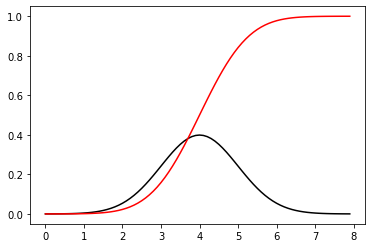

In [21]:
plt.plot(support,norm_pdf,color='black')
plt.plot(support,norm_cdf,color='red')

## 하측확률과 퍼센트포인트

In [23]:
stats.norm.ppf(loc=0,scale=1,q=0.05)

-1.6448536269514729

In [24]:
stats.norm.ppf(loc=0,scale=1,q=0.025)

-1.9599639845400545

In [25]:
stats.norm.ppf(loc=0,scale=1,q=0.975)

1.959963984540054

## t-분포

In [26]:
stats.t.pdf(x=0.5,df=8)

0.33669389792822757

In [37]:
support=np.arange(-8,8,0.1)
norm_pdf=stats.norm.pdf(loc=0,scale=1,x=support)
t_pdf=stats.t.pdf(x=support,df=5)

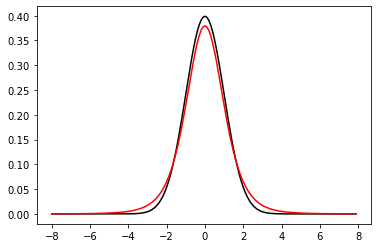

In [38]:
plt.plot(support,norm_pdf,color='black')
plt.plot(support,t_pdf,color='red')

## 신뢰구간

In [39]:
t_975=stats.t.ppf(q=0.975,df=8)

In [40]:
t_975

2.3060041350333704

In [41]:
se=sigma/sp.sqrt(8)

<ipython-input-41-4d94c57c9de7>:1: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  se=sigma/sp.sqrt(8)


In [42]:
sample_mean=4.2

In [43]:
sample_mean+t_975*se

5.015295580663158

In [44]:
sample_mean-t_975*se

3.3847044193368427

In [49]:
stats.t.interval(alpha=0.95,df=8,loc=4.2,scale=se) #loc=표본평균, scale=표본표준편차

(3.3847044193368427, 5.015295580663158)

## 통계적 가설검정

- 귀무가설: 한양대학생_평균키 = 성균관대학생_평균키
- 대립가설: 한양대학생_평균키 != 성균관대학생_평균키

-> 평균키가 다르면, 귀무가설을 기각함. ?? 근거=> 통계적 검정

In [54]:
# 결론 100% 확신은 없음 
# -> ??%의 신뢰수준
# 95% 신뢰수준 -> 5%의 유의수준 (alpha)

### 가설검정의 종류
- 평균: 일표본검정, 이표본검정, 대응표본검정
- 분산: 일표본, 이표본
- contingency table(범주형 변수): 분할표 검정 (카이제곱검정)

### Null Hypothesis Testing framework

**1. Setting up two competing hypotheses** - Each hypothesis test includes two hypothesis about the population.  One is the null hypothesis, notated as Ho, which is a statement of a particular parameter value.  This hypothesis is assumed to be true until there is evidence to suggest otherwise.  The second hypothesis is called the alternative, or research, hypothesis, notated as Ha.  The alternative hypothesis is a statement of a range of alternative values in which the parameter may fall.  One must also check that any assumptions (conditions) needed to run the test have been satisfied e.g. normality of data, independence, and number of success and failure outcomes.

**2. Set in advanced some level of significance, called alpha.**  This value is used as a probability cutoff for making decisions about the null hypothesis.  As we will learn later, this alpha value represents the probability we are willing to place on our test for making an incorrect decision in regards to rejecting the null hypothesis.  The most common alpha value is 0.05  or 5%. Other popular choices are 0.01 (1%) and  0.1 (10%).

**3. Calculate a test statistic and the p-value (or find rejection region)** Gather sample data and calculate a test statistic where the sample statistic is compared to the parameter value.  The test statistic is calculated under the assumption the null hypothesis is true, and incorporates a measure of standard error and assumptions (conditions) related to the sampling distribution.  Such assumptions could be normality of data, independence, and number of success and failure outcomes. A p-value is found by using the test statistic to calculate the probability of the sample data producing such a test statistic or one more extreme.  The rejection region is found by using alpha to find a critical value; the rejection region is the area that is more extreme than the critical value.

**4. Make a test decision about the null hypothesis -**  In this step we decide to either reject the null hypothesis or decide to fail to reject the null hypothesis.  Notice we do not make a decision where we will accept the null hypothesis. 

**5. State an overall conclusion - **Once we have found the p-value or rejection region, and made a statistical decision about the null hypothesis (i.e. we will reject the null or fail to reject the null).  Following this decision, we want to summarize our results into an overall conclusion for our test.

<h2>Some Statistical test from <code>scipy.stats</code></h2>

* kurtosistest(a[, axis, nan_policy])	Tests whether a dataset has normal kurtosis
* normaltest(a[, axis, nan_policy])	Tests whether a sample differs from a normal distribution.
* skewtest(a[, axis, nan_policy])	Tests whether the skew is different from the normal distribution.
* pearsonr(x, y)	Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.
* ttest_1samp(a, popmean[, axis, nan_policy])	Calculates the T-test for the mean of ONE group of scores.
* ttest_1samp(a, popmean[, axis, nan_policy])	Calculates the T-test for the mean of ONE group of scores.
* ttest_ind(a, b[, axis, equal_var, nan_policy])	Calculates the T-test for the means of two independent samples of scores.
* ttest_ind_from_stats(mean1, std1, nobs1, ...)	T-test for means of two independent samples from descriptive statistics.
* ttest_rel(a, b[, axis, nan_policy])	Calculates the T-test on TWO RELATED samples of scores, a and b.
* kstest(rvs, cdf[, args, N, alternative, mode])	Perform the Kolmogorov-Smirnov test for goodness of fit.
* chisquare(f_obs[, f_exp, ddof, axis])	Calculates a one-way chi square test.
* ansari(x, y)	Perform the Ansari-Bradley test for equal scale parameters
* bartlett(*args)	Perform Bartlett’s test for equal variances
* levene(*args, **kwds)	Perform Levene test for equal variances.
* shapiro(x[, a, reta])	Perform the Shapiro-Wilk test for normality.
* anderson(x[, dist])	Anderson-Darling test for data coming from a particular distribution
* anderson_ksamp(samples[, midrank])	The Anderson-Darling test for k-samples.

In [1]:
import pandas as pd 
student = pd.read_csv("student.csv", sep=";")

In [2]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In this demostration we are interested in 3 variables:

1. Alcohol consumption level (we will create it and call it `acl`)
2. Final grade for the course subject (`G3`)
3. Gender of the student

In [3]:
student['alcohol_index'] = (5*student['Dalc'] + 2*student['Walc'])/7 # Dalc , Walc 가중 평균

In [4]:
student.alcohol_index.describe()

count    649.000000
mean       1.724631
std        0.932727
min        1.000000
25%        1.000000
50%        1.285714
75%        2.142857
max        5.000000
Name: alcohol_index, dtype: float64

In [5]:
# Alcohol consumption level
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

In this demostration we are interested in 3 variables:

1. Alcohol consumption level (we will create it and call it `acl`)
2. Final grade for the course subject (`G3`)
3. Gender of the student



In [6]:
student.rename(columns={'sex':'gender'}, inplace=True)

In [7]:
student.head()

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,alcohol_index,acl
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,1.000000,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,1.000000,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,2.285714,High
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,1.000000,Low
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,1.285714,Low


## Are the population variances equal in the two groups of students (Low vs. High alcohol consumption)?

Let's perform the Bartetts's test whose Null Hypothesis is that the variances are equal. We will use a significance level of 5.0%

In [8]:
student.groupby('acl')['G3'].var()

acl
High    11.151406
Low      9.765917
Name: G3, dtype: float64

In [9]:
grades_low_acl = student['G3'].loc[student['acl']=='Low']
grades_high_acl = student['G3'].loc[student['acl']=='High']

In [10]:
grades_high_acl

2      12
18      7
23     10
27     11
29     12
       ..
633    14
635     9
640     0
647    10
648    11
Name: G3, Length: 166, dtype: int64

In [11]:
from scipy import stats
stats.bartlett(grades_low_acl, grades_high_acl)
# Do not reject H0: 분산이 같다고 유의수준 alpha에서 말할 수 있다. 

BartlettResult(statistic=1.1025085913378183, pvalue=0.29371623181175127)

According to the test we **cannot** reject the Null hypothesis of equal variances, so we will use assume that the two groups are samples from a population with the same variances. This information will be useful in our next test.

## Does alcohol consumption affect academic performance?

The visualizations sugest there is a difference between the means of the final grade of the two groups. Now we will perform a formal statistical test to confirm the hypothesis that students with High alcohol consumption level perform worse than the students with Low alcohol consumption level.

> **Null Hypothesis: for both groups (High and Low ACL) the population means of the final grade are equal.**

>  **Alternative Hypothesis: The population means of the final grades are different.**

A common test to apply in for these cases is the two-sample t-test, which is used to determine if two population means are equal. 

All statistical tests have assumptions that must be checked for their conclusions to be valid, for these test the assumptions are:

1. **Independent samples**: we will assume that the method for collecting the data assured that the answers given by the students are independent.
2. **Large enough sample size or observations come from a normally-distributed population**: this assumption is required if we are working with small samples (less than 30), since in the smaller group we have 166 observations we can say that we have a "large enough" sample.
3. **Variances are equal**

In addition this test have two versions: one assuming equal variances and the other assumming unequal variances.

According to the test we can not reject the Null hypothesis of equal variances, so we will use assume that the two samples come from a population with the same population variances. Time to perform our t-test.

In [12]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school         649 non-null    object 
 1   gender         649 non-null    object 
 2   age            649 non-null    int64  
 3   address        649 non-null    object 
 4   famsize        649 non-null    object 
 5   Pstatus        649 non-null    object 
 6   Medu           649 non-null    int64  
 7   Fedu           649 non-null    int64  
 8   Mjob           649 non-null    object 
 9   Fjob           649 non-null    object 
 10  reason         649 non-null    object 
 11  guardian       649 non-null    object 
 12  traveltime     649 non-null    int64  
 13  studytime      649 non-null    int64  
 14  failures       649 non-null    int64  
 15  schoolsup      649 non-null    object 
 16  famsup         649 non-null    object 
 17  paid           649 non-null    object 
 18  activities

In [13]:
stats.ttest_ind(grades_low_acl, grades_high_acl, equal_var=True) # 범주형 변수와 수치형 변수간의 관계를 파악
# reject H0--> 알콜 소비량이 성적에 영향을 준다.
# (x_1_bar-x_2_bar)/(s_p(1/sqrt(n_1)+1/sqrt(n_2))

Ttest_indResult(statistic=4.621320706949354, pvalue=4.603608830369269e-06)

Since we got such a low p-value we can reject the Null hypothesis of equal means for the two groups at a level of significance of 5%.

> **Conclusion: there is a statistical significant difference between the grades in the two analyzed groups, since the mean for the group with high alcohol consumption is less than the mean of the other group, the results suggest that alcohol consumption has a negative impact on students' academic performance.**

In [16]:
# acl vs. G3 / gender vs. G3
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'G3'}, xlabel='gender'>

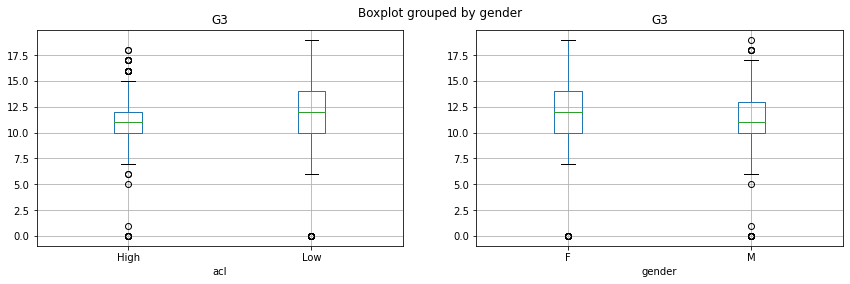

In [22]:
fig, axes = plt.subplots(1,2, figsize=(14,4))
student.boxplot(column='G3', by='acl', ax=axes[0])
student.boxplot(column='G3', by='gender', ax=axes[1])

## Do male teenager drink more than female teenager?

In [24]:
gender_acl_table=pd.crosstab(student.acl,student.gender)

In [26]:
chi_stat, p_value, dof, expected=stats.chi2_contingency(gender_acl_table)

In [28]:
gender_acl_table

gender,F,M
acl,,
High,62,104
Low,321,162


In [27]:
stats.chi2_contingency(gender_acl_table)

(42.08718662606401,
 8.72933011769437e-11,
 1,
 array([[ 97.96302003,  68.03697997],
        [285.03697997, 197.96302003]]))

<AxesSubplot:xlabel='acl'>

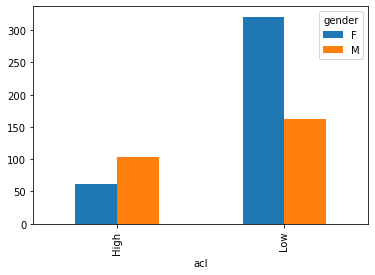

In [29]:
gender_acl_table.plot(kind='bar')